In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data

In [2]:
df = pd.read_csv("chips.csv")
df.describe()

,x,y,class
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [4]:
def toXy(data):
    return data[["x", "y"]], data[["class"]]

In [5]:
train_X, train_y = toXy(train)
test_X, test_y = toXy(test)

Decision Tree

In [6]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier(criterion = "entropy")

In [7]:
model1.fit(train_X,train_y)
model1.score(test_X, test_y)

0.625

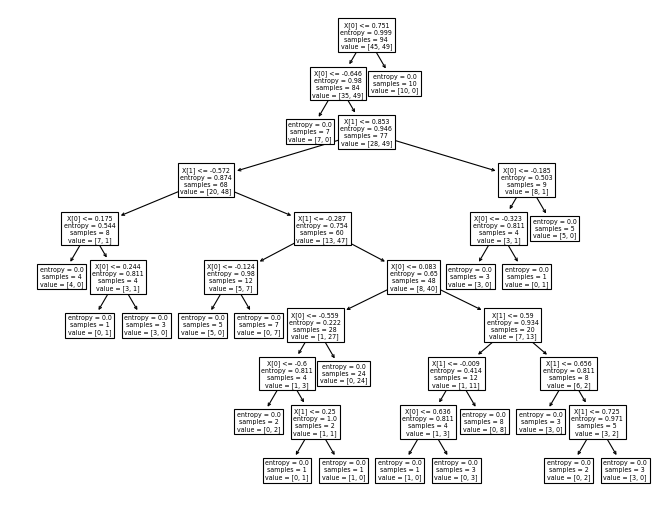

In [8]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
plot = tree.plot_tree(model1)

In [18]:
def score_from_depth():
    scores_train = []
    scores_test = []
    for depth in range(0, 20):
        model = tree.DecisionTreeClassifier(max_depth = depth, criterion = "entropy")
        model.fit(train_X, train_y)
        scores_train.append(model.score(train_X, train_y))
        scores_test.append(model.score(test_X, test_y))
    return scores_train, scores_test
scores_train, scores_test = score_from_depth()
plt.plot(scores_train)
plt.plot(scores_test)
#plt.ylim(0, 1)

TypeError: __init__() got an unexpected keyword argument 'depth'

RandomForest

[0.8297872340425532, 0.7872340425531915, 0.9361702127659575, 0.9042553191489362, 0.9574468085106383, 0.9787234042553191, 0.9680851063829787, 0.9787234042553191, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 0.9893617021276596, 1.0, 0.9893617021276596, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


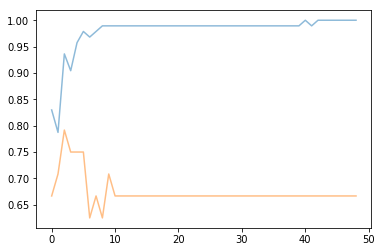

In [10]:
from sklearn.ensemble import RandomForestClassifier
def score_from_num_of_estim():
    scores_train = []
    scores_test = []
    for n_estim in range(1, 50):
        model = RandomForestClassifier(n_estimators = n_estim, random_state = 1)
        model.fit(train_X, np.ravel(train_y))
        scores_train.append(model.score(train_X, np.ravel(train_y)))
        scores_test.append(model.score(test_X, np.ravel(test_y)))
    return scores_train, scores_test
scores_train, scores_test = score_from_num_of_estim()
print(scores_train)
plt.plot(scores_train, alpha = 0.5)
plt.plot(scores_test, alpha = 0.5)
#plt.ylim(0, 1)

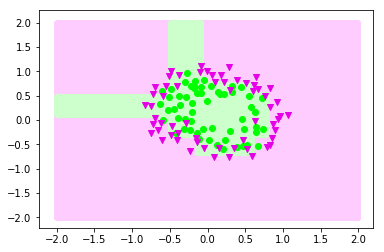

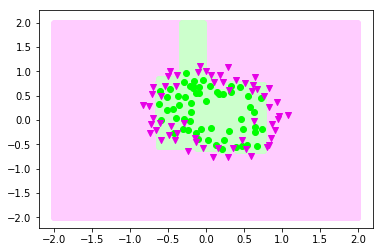

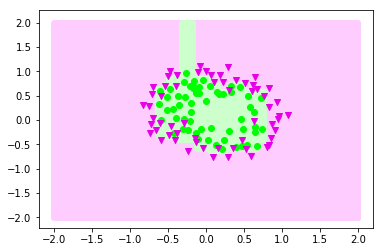

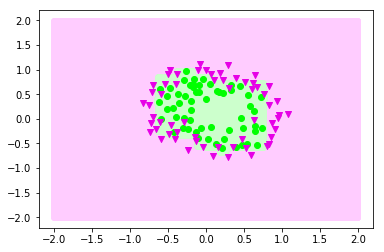

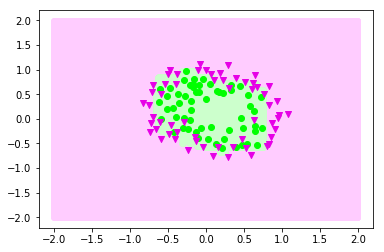

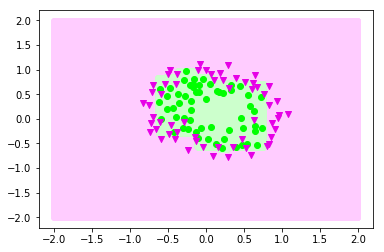

[0.6666666666666666,
 0.5833333333333334,
 0.7083333333333334,
 0.7083333333333334,
 0.7083333333333334,
 0.7083333333333334]

In [11]:
def visualize():
    scores = []
    estims = [1, 3, 7, 23, 40, 50]
    for n_estim in estims:
        model = RandomForestClassifier(n_estimators = n_estim)
        model.fit(train_X, np.ravel(train_y))
        scores.append(model.score(test_X, np.ravel(test_y)))
        x = np.arange(-2, 2, 0.01)
        y = np.arange(-2, 2, 0.01)
        X, Y= np.meshgrid(x,y)
        X = X.flatten()
        Y = Y.flatten()
        #X = np.concatenate(X)
        #Y = np.concatenate(Y)
        XY=pd.DataFrame(data = {"x": X, "y": Y})
        Z = model.predict(XY)
        data0 = XY[Z == 0]
        data1 = XY[Z == 1]
        #print(Z.shape)
        plt.scatter(data0.x, data0.y, color = '#ffccff')
        plt.scatter(data1.x, data1.y, color = '#ccffcc')
        data_o = df[df["class"] == 1]
        data_v = df[df["class"] == 0]
        #print(data_v)
        #print(train_y == 0)
        plt.scatter(data_o.x, data_o.y, marker = 'o', color =  '#00ff00')
        plt.scatter(data_v.x, data_v.y, marker = 'v', color ='#e600e6')
        plt.show()
    return scores
visualize()

Boosting

[0.6276595744680851, 0.7021276595744681, 0.776595744680851, 0.8191489361702128, 0.776595744680851, 0.8404255319148937, 0.8617021276595744, 0.8936170212765957, 0.8723404255319149, 0.8617021276595744, 0.8723404255319149, 0.851063829787234, 0.8829787234042553, 0.8936170212765957, 0.8829787234042553, 0.8936170212765957, 0.8936170212765957, 0.8936170212765957, 0.8936170212765957, 0.9148936170212766, 0.9148936170212766, 0.925531914893617, 0.9361702127659575, 0.9148936170212766, 0.925531914893617, 0.925531914893617, 0.925531914893617, 0.9148936170212766, 0.9361702127659575, 0.9148936170212766, 0.9468085106382979, 0.9148936170212766, 0.9680851063829787, 0.9574468085106383, 0.9574468085106383, 0.9468085106382979, 0.9787234042553191, 0.9680851063829787, 0.9787234042553191, 0.9787234042553191, 0.9680851063829787, 0.9787234042553191, 0.9680851063829787, 0.9680851063829787, 0.9680851063829787, 0.9680851063829787, 0.9680851063829787, 0.9680851063829787, 0.9787234042553191]


(0, 1)

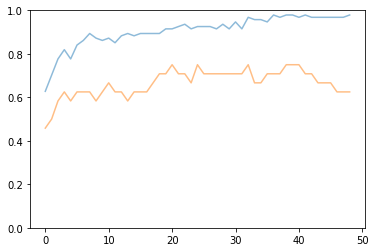

In [12]:
from sklearn.ensemble import AdaBoostClassifier
def score_from_num_of_estim():
    scores_train = []
    scores_test = []
    for n_estim in range(1, 50):
        model = AdaBoostClassifier(n_estimators = n_estim)
        model.fit(train_X, np.ravel(train_y))
        
        scores_train.append(model.score(train_X, np.ravel(train_y.values)))
        scores_test.append(model.score(test_X, np.ravel(test_y.values)))
    return scores_train, scores_test
scores_train, scores_test = score_from_num_of_estim()
print(scores_train)
plt.plot(scores_train, alpha = 0.5)
plt.plot(scores_test, alpha = 0.5)
plt.ylim(0, 1)

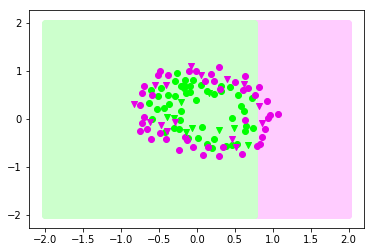

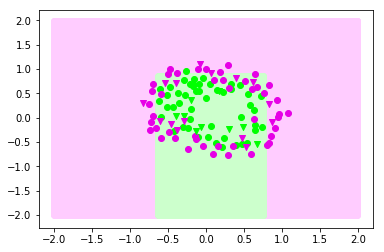

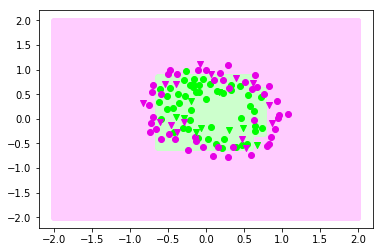

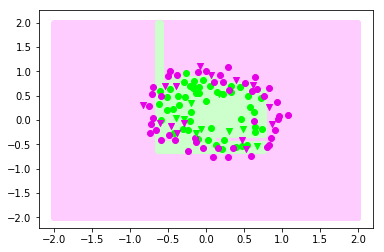

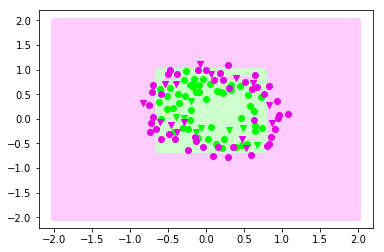

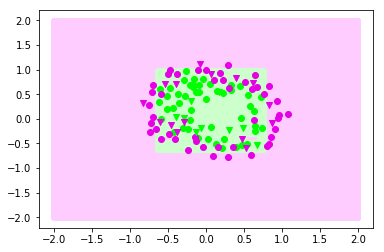

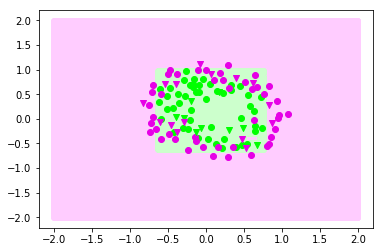

[0.4583333333333333,
 0.5833333333333334,
 0.625,
 0.7083333333333334,
 0.75,
 0.625,
 0.5833333333333334]

In [15]:
def visualize():
    scores = []
    estims = [1, 3, 7, 23, 40, 50, 100]
    for n_estim in estims:
        model = AdaBoostClassifier(n_estimators = n_estim)
        model.fit(train_X, np.ravel(train_y))
        scores.append(model.score(test_X, np.ravel(test_y)))
        x = np.arange(-2, 2, 0.01)
        y = np.arange(-2, 2, 0.01)
        X, Y= np.meshgrid(x,y)
        X = X.flatten()
        Y = Y.flatten()
        #X = np.concatenate(X)
        #Y = np.concatenate(Y)
        XY=pd.DataFrame(data = {"x": X, "y": Y})
        Z = model.predict(XY)
        data0 = XY[Z == 0]
        data1 = XY[Z == 1]
        #print(Z.shape)
        plt.scatter(data0.x, data0.y, color = '#ffccff')
        plt.scatter(data1.x, data1.y, color = '#ccffcc')
        data_o = train[train["class"] == 1]
        data_v = train[train["class"] == 0]
        data_o1 = test[test["class"] == 1]
        data_v1 = test[test["class"] == 0]
        #print(data_v)
        #print(train_y == 0)
        plt.scatter(data_o.x, data_o.y, marker = 'o', color =  '#00ff00')
        plt.scatter(data_v.x, data_v.y, marker = 'o', color ='#e600e6')
        plt.scatter(data_o1.x, data_o1.y, marker = 'v', color =  '#00ff00')
        plt.scatter(data_v1.x, data_v1.y, marker = 'v', color ='#e600e6')
        plt.show()
    return scores
visualize()